In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [4]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\6.overlap.csv',header=None)

In [5]:
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

<Axes: xlabel='0', ylabel='1'>

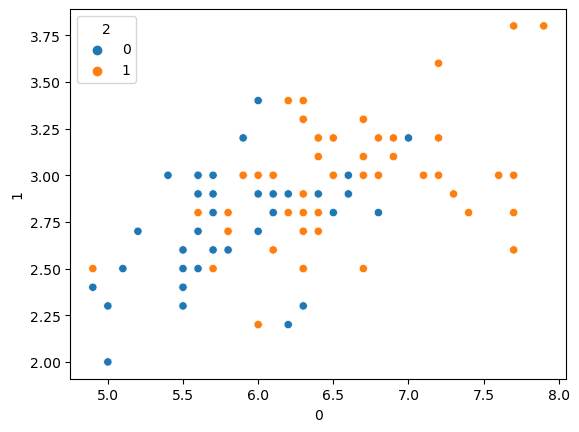

In [7]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [9]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [18]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.007),bias_regularizer=L2(0.003)))

In [19]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 3s 36ms/step - loss: 0.8361 - accuracy: 0.5185 - val_loss: 0.6678 - val_accuracy: 0.7778
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.8257 - accuracy: 0.5309 - val_loss: 0.6505 - val_accuracy: 0.7778
Epoch 3/20
17/17 [==============================] - 0s 11ms/step - loss: 0.8156 - accuracy: 0.5432 - val_loss: 0.6397 - val_accuracy: 0.7778
Epoch 4/20
17/17 [==============================] - 0s 13ms/step - loss: 0.8071 - accuracy: 0.5556 - val_loss: 0.6251 - val_accuracy: 0.7778
Epoch 5/20
17/17 [==============================] - 0s 11ms/step - loss: 0.7985 - accuracy: 0.5432 - val_loss: 0.6118 - val_accuracy: 0.7778
Epoch 6/20
17/17 [==============================] - 0s 11ms/step - loss: 0.7915 - accuracy: 0.5432 - val_loss: 0.6088 - val_accuracy: 0.7778
Epoch 7/20
17/17 [==============================] - 0s 11ms/step - loss: 0.7861 - accuracy: 0.5432 - val_loss: 0.5987 - val_accuracy: 0.7778
Epoch 8/20
17

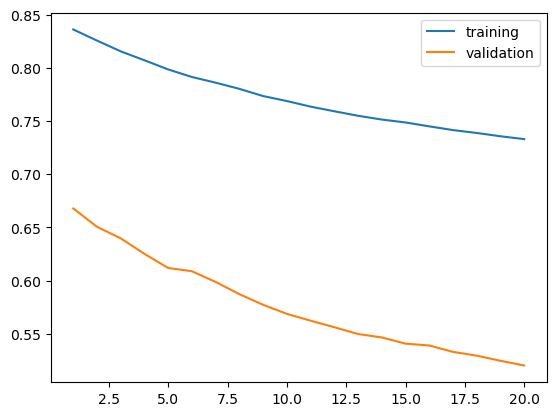

In [20]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 48s 5ms/step


<Axes: >

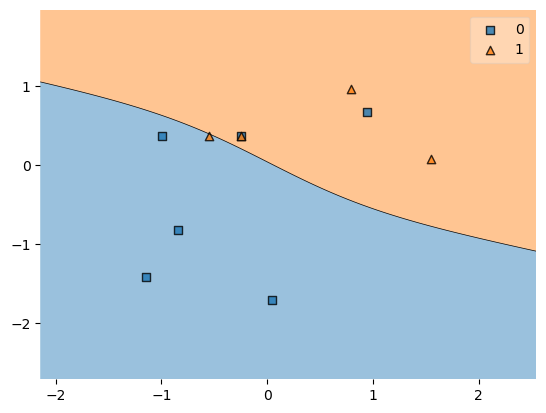

In [21]:
plot_decision_regions(x_testp,y_test.values,clf=model)